### Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tensorflow.python.client import device_lib

warnings.filterwarnings("ignore")
%matplotlib inline

<!--  -->

### Tensorflow Configuration Details

In [2]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1044561174712454749
 xla_global_id: -1]

Observation
- TF is connected to CPU, because we are installed TF CPU version.

<!--  -->

### Sample Data

In [148]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

- Train and Test Splits

In [149]:
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = mnist.load_data()

In [150]:
print(f"Train Images: {X_train_images.shape[0]}, Train Rows: {X_train_images.shape[1]}, Train Columns: {X_train_images.shape[1]}")
print(f"Train Labels: {y_train_labels.shape[0]}")

print(f"Test Images: {X_test_images.shape[0]}, Test Rows: {X_test_images.shape[1]}, Test Columns: {X_test_images.shape[1]}")
print(f"Test Labels: {y_test_labels.shape[0]}")

Train Images: 60000, Train Rows: 28, Train Columns: 28
Train Labels: 60000
Test Images: 10000, Test Rows: 28, Test Columns: 28
Test Labels: 10000


<!--  -->

### Normalization

In [151]:
# Normalize the images to the range of [0, 1]
X_train_images = X_train_images / 255.0
X_test_images = X_test_images / 255.0

In [152]:
X_train_images[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [153]:
X_test_images[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

<!--  -->

### Flattening Images : 28 * 28 matrix repesentation to 1D array

Note: Dimensions Reducing For NN Training

- Neural networks, especially fully connected layers, expect input data in a flat, 1D format. Since MNIST images are originally 28x28 pixels, they need to be flattened into a single vector with 784 elements before being fed into the network.

In [154]:
X_train_images = X_train_images.reshape(-1, 28*28).astype(np.float32)
X_test_images = X_test_images.reshape(-1, 28*28).astype(np.float32)

<!--  -->

- Train Data

In [155]:
# Train Data Overview
print(f'Train predictors data shape: {X_train_images.shape}')
print(f'Test target data shape: {y_train_labels.shape}')


Train predictors data shape: (60000, 784)
Test target data shape: (60000,)


In [156]:
X_train_images[:1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [157]:
y_train_labels[:1]

array([5], dtype=uint8)

- Test Data

In [158]:
# Test Data Overview
print(f'Test predictors shape: {X_test_images.shape}')
print(f'Test target shape: {y_test_labels.shape}')

Test predictors shape: (10000, 784)
Test target shape: (10000,)


In [159]:
X_test_images[:1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [160]:
y_test_labels[:1]

array([7], dtype=uint8)

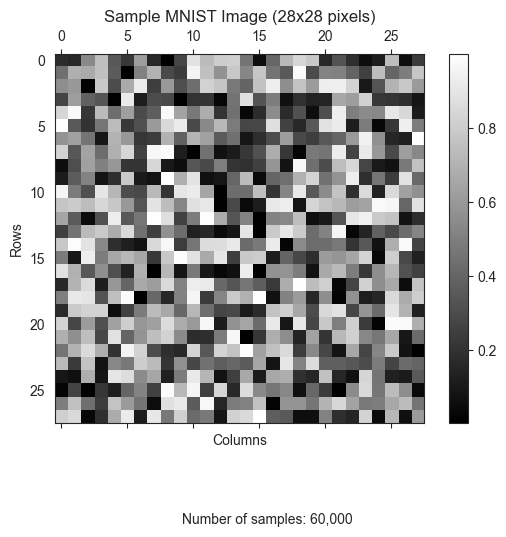

In [161]:
# sns.axes_style = 'crosshair'
sns.set_style('white')
# Create a figure
fig, ax = plt.subplots()

# Generate a sample image (28x28 pixels) for visualization
sample_image = np.random.rand(28, 28)

# Display the sample image
cax = ax.matshow(sample_image, cmap='gray')

# Add color bar to show pixel intensity
fig.colorbar(cax)

# Label the axes to indicate the dimensions
ax.set_xticks(np.arange(0, 28, 5))
ax.set_yticks(np.arange(0, 28, 5))
ax.set_xticklabels(np.arange(0, 28, 5))
ax.set_yticklabels(np.arange(0, 28, 5))

# Title and labels to illustrate the structure
plt.title('Sample MNIST Image (28x28 pixels)')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Annotate the number of samples
fig.text(0.5, -0.1, 'Number of samples: 60,000', ha='center')

plt.show()


Observation

- (60000, 28, 28) indicates that the training dataset consists of 60,000 images, each of which is a 28x28 matrix of pixel values
- 60000: This is the number of samples in the training dataset. The MNIST dataset contains 60,000 training images of handwritten digits.
- 28, 28: Each image in the MNIST dataset is a 28x28 pixel grayscale image. This means that each image has 28 rows and 28 columns of pixel values.

i.e., 3rd tensor : one side each image index, other two sides corresponding to each image index have 28 rows and 28 columns. For one image we have 28 cols and rows like above.

<!--  -->

### One-hot Encoding : Target Variable

In [162]:
y_train_labels = tf.keras.utils.to_categorical(y_train_labels, num_classes=10).astype(np.float32)
y_test_labels = tf.keras.utils.to_categorical(y_test_labels, num_classes=10).astype(np.float32)

In [163]:
y_train_labels[:1] # 5

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [164]:
y_test_labels[:1] # 7

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

<!--  -->

### TensorFlow DataSet

Overall, this code snippet prepares the training data for efficient training.

* This approach is particularly useful when dealing with large datasets that cannot be loaded into memory entirely.
* Shuffling the data helps prevent the model from overfitting to the training set and improves generalization performance.
* Batching the data improves computational efficiency during training by processing multiple data points at once.

- The from_tensor_slices method splits the input data into individual samples.
- The shuffle method randomizes the order of these samples.
- The batch method groups the randomized samples into batches of 100.

```text
Example
Assume we have a dataset with 5 samples:

train_images = [image1, image2, image3, image4, image5]
train_labels = [label1, label2, label3, label4, label5]
Here's how the operations work:

from_tensor_slices((train_images, train_labels)) creates a dataset with elements [(image1, label1), (image2, label2), (image3, label3), (image4, label4), (image5, label5)].

shuffle(buffer_size=5) shuffles these elements. An example shuffle could result in [(image3, label3), (image1, label1), (image5, label5), (image2, label2), (image4, label4)].

batch(2) then groups these shuffled elements into batches of 2. The resulting dataset might look like [((image3, label3), (image1, label1)), ((image5, label5), (image2, label2)), ((image4, label4))].
```

In [165]:
# Create TensorFlow Dataset
# buffer_size=60000 is the size of the training data images, it is the maximum limit
train_dataset = tf.data.Dataset\
                .from_tensor_slices((X_train_images, y_train_labels))\
                .shuffle(buffer_size=60000)\
                .batch(100)

test_dataset = tf.data.Dataset\
                .from_tensor_slices((X_test_images, y_test_labels))\
                .batch(100)

In [166]:
print(train_dataset)
print(test_dataset)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>


<!--  -->

### Model Hyperparameters

These below lines initializes the weights and biases for a neural network with 784 input features and 10 output classes, all starting with zeros and ready to be updated during training.

In [167]:
W = tf.Variable(tf.zeros([784, 10], dtype=tf.float32))
b = tf.Variable(tf.zeros([10], dtype=tf.float32))

In [168]:
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>


<!--  -->

### Model : Soft Max Activation Function [Multi Class Prediction]

In [169]:
def model(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

<!--  -->

### Loss Function

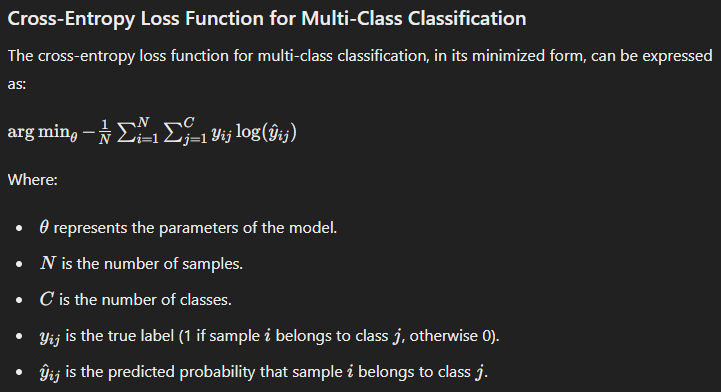

In [170]:
# Cross entropy loss function
def loss_func(y_true, y_pred):
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1))

<!--  -->

### Optimizer for Loss Function Optimization

In [171]:
# Stochastic Gradient Descent
optimizer = tf.optimizers.SGD(learning_rate=0.05) # learning rate higher means higher learning rate / momentum / steps per epoch to update weights

<!--  -->

### Traing Step: Loss Calculation and Weight Updation

**Weights Updation**

Both snippets perform the same basic operation: they update the model's weights and biases using the calculated gradients.

The first approach utilizes the apply_gradients method provided by the optimizer, which abstracts the details of the update process.

```python
grads = tape.gradient(loss_value, [W, b])
```

The second approach manually performs the update using basic TensorFlow operations.
```python
for g,v in zip(grads, model.variables):
    v.assign_sub(learning_rate * g)
```

In [172]:
def train_step(images, labels):
    with tf.GradientTape() as tape: # To calculate gradient of loss function w.r.t paremeters i.e., weights and bias.
        predictions = model(images) # calculate all prediction probabilities on given images
        loss_value = loss_func(labels, predictions)
    # Calculate gradients of loss function i.e., tf.nn.softmax(tf.matmul(x, W) + b) w.r.t weights and bias
    # Here loss_value is nothing but loss_func
    grads = tape.gradient(loss_value, [W, b]) # To calculate gradient of loss function w.r.t paremeters i.e., weights and bias.
    # Update weights & bias using optimizer    
    optimizer.apply_gradients(zip(grads, [W, b]))
    # Above is same like below code
    # for g,v in zip(grads, model.variables):
    #     v.assign_sub(learning_rate * g)
    return loss_value


<!--  -->

### Model Hyperparameters

In [173]:
num_epochs = 100
losses = []

<!--  -->

### Model Training

In [174]:
for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean() # tf.keras.metrics.Mean() is used to keep track of the average loss for each epoch
    for images, labels in train_dataset: # Training as per batches and updating weights and bias per each Epoch, as trainining all TrainingImages once is difficult 
        loss = train_step(images, labels)
        epoch_loss_avg.update_state(loss)
    losses.append(epoch_loss_avg.result().numpy())
    if (epoch+1) % 5 == 0:
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss_avg.result().numpy()}")

Epoch 5, Loss: 0.33370545506477356
Epoch 10, Loss: 0.30312997102737427
Epoch 15, Loss: 0.2900145351886749
Epoch 20, Loss: 0.2819962501525879
Epoch 25, Loss: 0.27655020356178284
Epoch 30, Loss: 0.27227291464805603
Epoch 35, Loss: 0.2690746784210205
Epoch 40, Loss: 0.26645514369010925
Epoch 45, Loss: 0.2639930844306946
Epoch 50, Loss: 0.262114554643631
Epoch 55, Loss: 0.26041728258132935
Epoch 60, Loss: 0.2589699327945709
Epoch 65, Loss: 0.25742805004119873
Epoch 70, Loss: 0.2563067078590393
Epoch 75, Loss: 0.25507158041000366
Epoch 80, Loss: 0.2541942000389099
Epoch 85, Loss: 0.2531150281429291
Epoch 90, Loss: 0.25230520963668823
Epoch 95, Loss: 0.25149548053741455
Epoch 100, Loss: 0.25069111585617065


- **Training Loss Optimization**

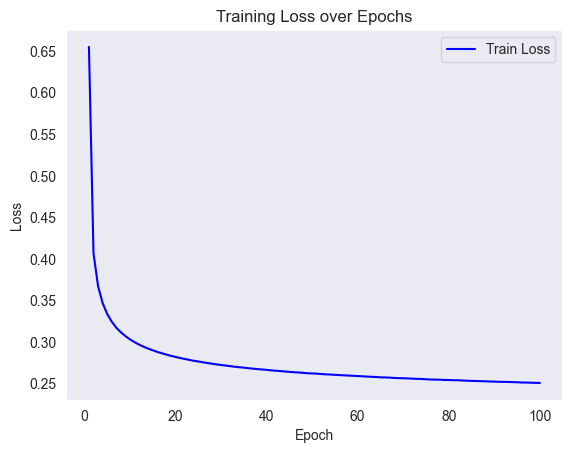

In [178]:
# Plotting loss over epochs
sns.set_style("dark")
plt.plot(range(1, num_epochs + 1), losses, 'b', label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

<!--  -->

### Model Evaluation

In [175]:
# Evaluate the model on the test dataset
def model_accuracy(test_dataset):
    # tf.keras.metrics.CategoricalAccuracy() is a class in TensorFlow's Keras API that calculates how often predictions match one-hot labels. It is typically used for evaluating the accuracy of a multi-class classification model.
    # Measures how often predictions match the one-hot encoded labels. It compares the index of the maximal true label with the index of the maximal predicted label.
    accuracy_metric = tf.keras.metrics.CategoricalAccuracy()
    for images, labels in test_dataset:
        predictions = model(images)
        accuracy_metric.update_state(labels, predictions)
    return accuracy_metric.result().numpy()

In [176]:
test_accuracy = model_accuracy(test_dataset)
print(F"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.93


<!--  -->

Observations

- The model has achieved a test accuracy of approximately 98.53%. This means that the model's predictions on the test dataset are correct 98.53% of the time.

- The model's training loss has been decreasing over the epochs, indicating that the model is learning from the training data and improving its performance.